In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import mojimoji
import numpy as np

In [2]:
with open("../data/train.csv",'r',newline='',encoding="utf_8_sig") as inputfile: #改行コードがあることを明示,BOM付きファイル削除
    #DataFrameを作成。pandasuはread_csv()がカンマ区切り、read_table()がタブ区切りを読み込む
    df = pd.read_csv(inputfile)
    #header : ヘッダーがないのでNoneを指定。あれば0を指定（指定しないと１行目は勝手にヘッダー扱いになる）、
    #name : 適当に名前を付与
    #index_col : 行番号をindexに指定
    #usecols ：CSVの読み込み対象とする列を指定するprint("dfタイプ：", type(df))
print("\nカラム定義：",df.columns)
print("\nデータ定義\n",df.dtypes)
print("\nサンプル表示\n")
df[0:5]


カラム定義： Index(['id', '賃料', '所在地', 'アクセス', '間取り', '築年数', '方角', '面積', '所在階', 'バス・トイレ',
       'キッチン', '放送・通信', '室内設備', '駐車場', '周辺環境', '建物構造', '契約期間'],
      dtype='object')

データ定義
 id         int64
賃料         int64
所在地       object
アクセス      object
間取り       object
築年数       object
方角        object
面積        object
所在階       object
バス・トイレ    object
キッチン      object
放送・通信     object
室内設備      object
駐車場       object
周辺環境      object
建物構造      object
契約期間      object
dtype: object

サンプル表示



,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間
3,4,150000,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,29年4ヶ月,南,60.48m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
4,5,74000,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,31年7ヶ月,南,39.66m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,給湯／\t独立キッチン,NaN,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間


In [3]:
#要素数確認（行）
len(df)

31470

In [4]:
#nullの数を確認する
print(df.isnull().sum())

id           0
賃料           0
所在地          0
アクセス         0
間取り          0
築年数          0
方角        2749
面積           0
所在階          0
バス・トイレ     329
キッチン       621
放送・通信     3440
室内設備        82
駐車場       5287
周辺環境      9432
建物構造         0
契約期間      7120
dtype: int64


#カテゴリデータの分布を確認する

In [5]:
def histplot(df,Column_axis,Count_value):
    df_by_id= df.groupby(Column_axis)[Count_value].count().reset_index()
    id_df = pd.DataFrame(df_by_id)
    sns.distplot(id_df.id, kde=False, rug=False, axlabel="record_count",bins=10)
    print("項目別カウント：\n")
    print(df_by_id)

項目別カウント：

           間取り     id
0          1DK   1893
1    1DK+S(納戸)     14
2           1K  11930
3     1K+S(納戸)     75
4         1LDK   4823
5   1LDK+S(納戸)    238
6    1LK+S(納戸)      2
7           1R   5082
8          2DK   1909
9    2DK+S(納戸)     25
10          2K    920
11    2K+S(納戸)      1
12        2LDK   2552
13  2LDK+S(納戸)    157
14         3DK    419
15   3DK+S(納戸)      6
16          3K     48
17    3K+S(納戸)      1
18        3LDK   1124
19  3LDK+S(納戸)     68
20         4DK     16
21          4K      4
22        4LDK    124
23  4LDK+S(納戸)     12
24         5DK      4
25   5DK+S(納戸)      1
26          5K      1
27        5LDK     15
28  5LDK+S(納戸)      4
29        6LDK      2


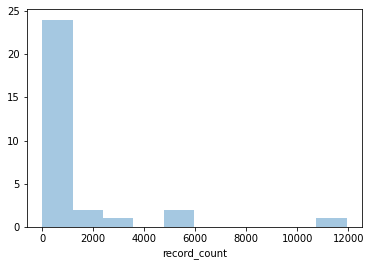

In [6]:
histplot(df,'間取り','id')

項目別カウント：

   方角    id
0   北  1966
1  北東  1321
2  北西  1326
3   南  8909
4  南東  3098
5  南西  3080
6   東  4995
7   西  4026


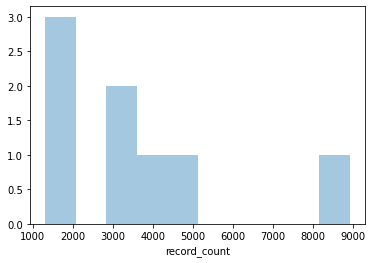

In [7]:
histplot(df,'方角','id')

項目別カウント：

                          建物構造     id
0              ALC（軽量気泡コンクリート）    297
1     HPC（プレキャスト・コンクリート（重量鉄骨））      4
2  PC（プレキャスト・コンクリート（鉄筋コンクリート））     46
3                 RC（鉄筋コンクリート）  17505
4              SRC（鉄骨鉄筋コンクリート）   2429
5                          その他    136
6                         ブロック      3
7                           木造   5512
8                         軽量鉄骨   1812
9                          鉄骨造   3726


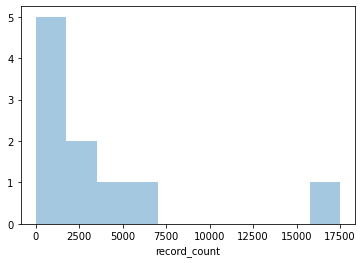

In [8]:
histplot(df,'建物構造','id')

項目別カウント：

                              バス・トイレ   id
0                               シャワー  849
1                       シャワー／\t洗面台独立   19
2                       シャワー／\t浴室乾燥機   23
3            シャワー／\t浴室乾燥機\t／\t温水洗浄便座    6
4    シャワー／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立    9
..                               ...  ...
355          追焚機能／\t浴室乾燥機\t／\t温水洗浄便座    2
356  追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立    2
357             追焚機能／\t浴室乾燥機\t／\t脱衣所    1
358                    追焚機能／\t温水洗浄便座    2
359            追焚機能／\t温水洗浄便座／\t洗面台独立    2

[360 rows x 2 columns]


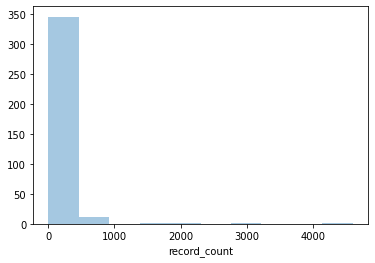

In [9]:
histplot(df,'バス・トイレ','id')

項目別カウント：

                                   キッチン   id
0                                 IHコンロ  110
1            IHコンロ\t／\tカウンターキッチン\t／\t給湯   10
2                       IHコンロ\t／\tコンロ1口   79
3           IHコンロ\t／\tコンロ1口／\tカウンターキッチン    1
4    IHコンロ\t／\tコンロ1口／\tカウンターキッチン\t／\t給湯    5
..                                  ...  ...
376     電気コンロ／\tシステムキッチン\t／\t給湯／\t冷蔵庫あり    3
377    電気コンロ／\tシステムキッチン\t／\t給湯／\t独立キッチン    1
378                          電気コンロ／\t給湯   61
379                  電気コンロ／\t給湯／\t冷蔵庫あり    7
380                 電気コンロ／\t給湯／\t独立キッチン    1

[381 rows x 2 columns]


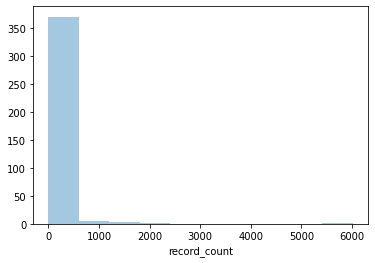

In [10]:
histplot(df,'キッチン','id')

項目別カウント：

                                           放送・通信   id
0                                         BSアンテナ  315
1                          BSアンテナ／\tインターネット使用料無料   27
2                                           CATV  979
3                                  CATV／\tBSアンテナ  216
4                   CATV／\tBSアンテナ／\tインターネット使用料無料    6
..                                           ...  ...
134                    高速インターネット／\t光ファイバー／\tCATV   88
135           高速インターネット／\t光ファイバー／\tCATV／\tBSアンテナ   25
136           高速インターネット／\t光ファイバー／\tCATV／\tCSアンテナ    6
137  高速インターネット／\t光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ   54
138         高速インターネット／\t光ファイバー／\tCSアンテナ／\tBSアンテナ   53

[139 rows x 2 columns]


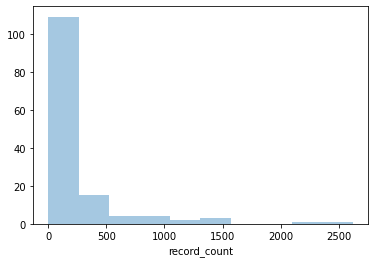

In [11]:
histplot(df,'放送・通信','id')

項目別カウント：

                                                   室内設備  id
0      24時間換気システム\t／\t室内洗濯機置場／\tタイル張り\t公営水道／\t下水／\t都市ガス   2
1                              2面採光\t公営水道／\t下水／\tプロパンガス   1
2                                2面採光\t公営水道／\t下水／\t都市ガス   5
3                                            2面採光\t都市ガス   1
4           2面採光／\tクッションフロア／\t室内洗濯機置場\t公営水道／\t下水／\t都市ガス   1
...                                                 ...  ..
6215                                  水道その他／\t下水／\t都市ガス   3
6216                          洗濯機置場なし\t公営水道／\t下水／\t都市ガス   2
6217                               洗濯機置場なし\t公営水道／\t都市ガス   1
6218  石油暖房／\tエアコン付\tシューズボックス／\tフローリング／\t2面採光／\t室内洗濯機...   1
6219                                               都市ガス  14

[6220 rows x 2 columns]


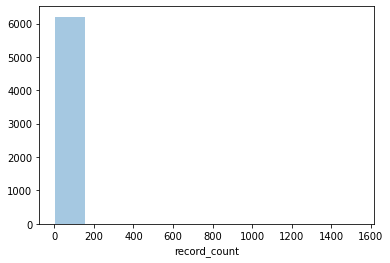

In [12]:
histplot(df,'室内設備','id')

項目別カウント：

        築年数   id
0     0年0ヶ月  704
1    0年10ヶ月  114
2    0年11ヶ月   97
3     0年1ヶ月  983
4     0年2ヶ月  644
..      ...  ...
741   9年6ヶ月   76
742   9年7ヶ月   48
743   9年8ヶ月   65
744   9年9ヶ月   38
745      新築  889

[746 rows x 2 columns]


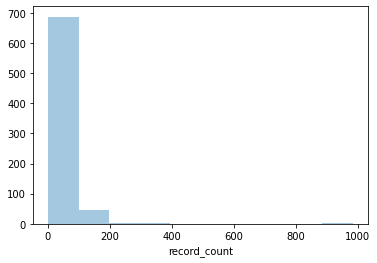

In [13]:
histplot(df,'築年数','id')

項目別カウント：

                          契約期間   id
0      10年間\t※この物件は\t定期借家\tです。    7
1                         12年間    1
2                         15年間    1
3                         1ヶ月間    1
4   1年10ヶ月間\t※この物件は\t定期借家\tです。    2
..                         ...  ...
61      5年間\t※この物件は\t定期借家\tです。  240
62     6ヶ月間\t※この物件は\t定期借家\tです。    1
63      6年間\t※この物件は\t定期借家\tです。    9
64      7年間\t※この物件は\t定期借家\tです。    4
65     9ヶ月間\t※この物件は\t定期借家\tです。    1

[66 rows x 2 columns]


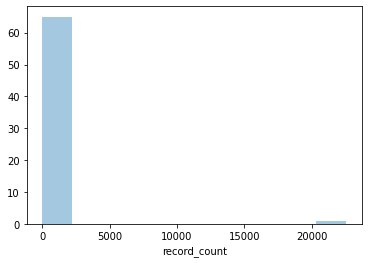

In [14]:
histplot(df,'契約期間','id')

### データとしては非常に汚い  
データに関して判明している事項を記載
 - カラム定義
     - 数値データ
         - '賃料'：目的関数
         - '築年数'：加工が必要、年々何ヶ月が日本語表記
         - '契約期間'：何年間という記載とローリングの付帯記載がある　　 nan有り
         - '面積'：m2が記載されているここを除去すれば数値になる  
     - カテゴリデータ
          - '間取り'
          - '方角'　nan有り
          - '建物構造'
     - 自然言語
          - '所在地'：住所
          - 'アクセス'：路線・駅・徒歩何分という記載、複数該当する場合もある
          - '所在階'
          - 'バス・トイレ'　nan有り
          - 'キッチン'　nan有り
          - '放送・通信'　nan有り
          - '室内設備'　nan有り
          - '駐車場'　nan有り
          - '周辺環境'　nan有り
 - 前処理方針
     - 面積・築年数はルールで数値に置き換える
     - カテゴリデータはコードに置き換える
     - 契約期間は数値と付帯のフラグに変換する
     - 所在地は県・区・住所におきかえる（それ以上細かいのは不要なはず）
     - アクセスは最寄りだけにする
     - バストイレ・キッチン・放送通信・室内設備はパターンが有りすぎるのでそのままカテゴリに置き換えても無意味。入っている項目別にフラフにすべき

In [15]:
#特徴量エンジニアリングの関数定義

#所在地（住所は区、丁目、番地などに６分割する）
def parse_address(text, debug=False):
    text = mojimoji.zen_to_han(text, kana=False)
    text = re.sub(r'[\(（].*[）\)]', '', text)
    text = re.sub(r'[\s、]', '', text)
    _ward = re.search(r'[a-zA-Z一-龥ぁ-んァ-ヶ・ー]+区', text)
    if _ward:
        ward = _ward.group()
        text = re.sub(ward, '', text)  # remove
    else:
        raise ValueError(text)

    text = text.replace('丁目', '-')
    text = text.replace('I', '1')
    text = re.sub(r'(以下|詳細)*未定', '', text)
    text = re.sub(r'[ー‐―−]', '-', text)
    text = re.sub(r'(\d)番[地]*', r'\1-', text)
    text = re.sub(r'[-]{2,}', r'-', text)
    text = re.sub(r'([a-zA-Z一-龥ぁ-んァ-ヶ・ー])(\d)', r'\1-\2', text)
    text = re.sub(r'(\d)号', r'\1', text)
    lines = text.split('-')
    lines += ['' for i in range(4 - len(lines))]  # adjust length
    return (ward, *lines)

#面積の加工処理（m2を削除）
def parse_area(text):
    area = float(text[:-2])
    return area

#築年数の加工処理（年月は数値に置き換えと新築は0にリプレイス）
def parse_buildage(text):
        if text == '新築':
            return 0
        year = re.search(r'\d+年',text)
        year = int(year.group()[:-1])
        month = re.search(r'\d+ヶ月',text)
        month = int(month.group()[:-2])

        buildage = year + month / 12
        return buildage

#間取り（29パターンあるが納戸を削除する）
def parse_floor_plan(text, debug=False):
    if '+S(納戸)' in text:
        text = text.replace('+S(納戸)', '')
        return text
    else:
        return text

#契約期間（年や月はそのまま取得、いついつまでは2019年から残期間扱い）
def parse_contract_period(text):
    if text != text:
        return np.nan
    text = mojimoji.zen_to_han(text, kana=False)
    yearmonth = re.search(r'(\d+年\d+ヶ月間|\d+年間|\d+ヶ月間)', text)
    if yearmonth:
        ym = re.findall(r'\d+', yearmonth.group())
        if len(ym) == 2:
            year, month = ym
        elif yearmonth.group()[-2] == '年':
            year, month = ym[0], 0
        elif yearmonth.group()[-2] == '月':
            year, month = 0, ym[0]
        left_year = int(year) + int(month) / 12
        return left_year
    else:
        untilym = re.search(r'\d+年\d+月まで', text)
        if untilym:
            year, month = re.findall(r'\d+', untilym.group())
            left_year = int(year) - 2019 + (int(month) - 7) / 12
            return left_year

#テキストデータのリスト化
def parse_text_normalize(text, debug=False):
    if text != text:
        return set()
    text = mojimoji.zen_to_han(text, kana=False) #全角を半角に統一
    text = text.replace('/', '') #スラッシュを削除
    vals = set(text.split('\t')) #バックスラッシュ&tで分割リスト化
    vals -= {''} #たまに出現するからリストを削除
    return vals

#バス・トイレを各々の要素有無のone-hotに加工する
def encode_etc(text, valset, debug=False):
    valset = np.array(valset)
    vals = np.array(list(parse_text_normalize(text, debug)))
    if len(vals) == 0:
        return np.full(len(valset), 9, dtype=np.uint8)
    if debug:
        print(valset, vals)
    return np.isin(valset, vals).astype(np.uint8)

In [16]:
def parse_access(text):
    text = text.split("\t\t")
    access_list = []
    for text_i in text:
        text_i = text_i.split('\t')
        if len(text_i) == 3:
            line_name, stat_name, dist = text_i

            # preprocess of line_name
            if "新幹線" in line_name or "ディズニー" in line_name:
                continue

            # preprocess of stat_name
            stat_name = re.sub(r"\(東京メトロ\)", "", stat_name)
            stat_name = re.sub(r"\(.+[県都]\)", "", stat_name)

            # preprocess of dist
            if "バス" in dist:
                # format : '/バス(23分)水道端下車徒歩4分'
                # print(len(text_i), text_i)
                # '/バス(23分)水道端下車徒歩4分' -> 23
                dist = re.sub(r"/バス\((\d+)分\).*", r"\1", dist)
                dist = f"バス{int(dist):02d}分"
                # print(dist)
            elif "車" in dist:
                # format : '車5.2km(18分)'
                # 全て3つ以上あるのでスキップ
                # print(len(text_i), text_i)
                # '車5.2km(18分)' -> 車18分
                dist = re.sub(r"車.+\((\d+)分\)", r"\1", dist)
                dist = f"車{int(dist):02d}分"
                # print(dist)
            else:
                # format : '徒歩10分'
                dist = dist.lstrip("徒歩").rstrip("分")
                dist = int(dist)
                if dist >= 60:
                    dist = "徒歩60>=分"
                else:
                    dist = f"徒歩{dist:02d}分"

            access_list.append((line_name, stat_name, dist))

        else:
            # len(text_i) == 1
            text_i = text_i[0]

            if "分" not in text_i:
                continue

            text_i = text_i.replace("JR", "")
            text_i = text_i.replace("ＪＲ", "")
            text_i = text_i.replace("東京メトロ", "")
            text_i = text_i.replace("京王電鉄", "")
            text_i = text_i.replace("東京都", "")
            text_i = text_i.replace("メトロ", "")

            text_i = re.sub(r"[\.『』「」：。・、\u3000]", "", text_i)  # 記号を取り除く

            text_i = text_i.replace("丸の内", "丸ノ内")
            text_i = text_i.replace("井の頭", "井ノ頭")
            text_i = text_i.replace("京王井ノ頭", "井ノ頭")

            if "バス" in text_i:
                if len(re.findall("分", text_i)) == 1:
                    # '都営バス／堀ノ内\u30002分' etc...
                    continue
                else:
                    # format : '山手線渋谷駅バス8分池尻住宅前下車徒歩5分'
                    # '分'が２回出てきてる
                    line_name = re.sub(r"(.+線).+", r"\1", text_i)
                    stat_name = re.sub(r".+線(.+駅).+", r"\1", text_i)
                    dist = re.sub(r".+バス(\d+)分.+", r"\1", text_i)
                    dist = f"バス{int(dist):02d}分"
                    # print(line_name, stat_name, dist)
                    access_list.append((line_name, stat_name, dist))
            else:
                # 以降全て徒歩分
                if "線" not in text_i and "駅" not in text_i:
                    # '小72／王子製紙裏門　4分'
                    # '東急・小田急「大橋停留所」停徒歩3分'
                    # etc
                    continue

                text_i = re.sub(r"分(.)", r"分\t\1", text_i)
                text_i = text_i.split('\t')

                for text_i_j in text_i:
                    if "m" in text_i_j or "ⅿ" in text_i_j:
                        # 720m的なやつ
                        continue
                    text_i_j = text_i_j.replace("/", "")
                    text_i_j = text_i_j.replace("徒歩", "")

                    if "駅" not in text_i_j:
                        # print(text_i_j, text_i)
                        line_name = re.sub(r"([^線]+線).+", r"\1", text_i_j)
                        stat_name = re.sub(
                            r".+線([^\d]+)\d+分", r"\1", text_i_j) + "駅"
                        dist = re.sub(r"[^\d]+(\d+)分.*", r"\1", text_i_j)
                        # print(line_name, stat_name, dist)
                    elif "線" not in text_i_j:
                        _match = re.search(
                            r"東京モノレール|ゆりかもめ|東京臨海高速鉄道|日暮里舎人ライナー", text_i_j)
                        if not _match:
                            continue
                        line_name = re.sub(
                            r"(東京モノレール|ゆりかもめ|東京臨海高速鉄道|日暮里舎人ライナー).*", r"\1", text_i_j)
                        stat_name = re.sub(
                            r"(東京モノレール|ゆりかもめ|東京臨海高速鉄道|日暮里舎人ライナー)([^\d]*)\d+分", r"\2", text_i_j)
                        dist = re.sub(
                            r"(東京モノレール|ゆりかもめ|東京臨海高速鉄道|日暮里舎人ライナー)[^\d]*(\d+)分", r"\2", text_i_j)
                        # print(line_name, stat_name, dist)
                    else:
                        line_name = re.sub(r"([^線]+線).+", r"\1", text_i_j)
                        stat_name = re.sub(r".+線(.+駅).+", r"\1", text_i_j)
                        dist = re.sub(r"[^\d]+(\d+)分.*", r"\1", text_i_j)
                        # print(line_name, stat_name, dist, text_i_j)

                    dist = int(dist)
                    if dist >= 60:
                        dist = "徒歩60>=分"
                    else:
                        dist = f"徒歩{dist:02d}分"
                    # print(line_name, stat_name, dist, text_i_j, sep="   \t")

                    access_list.append((line_name, stat_name, dist))

    for i in range(len(access_list)):
        line_name, stat_name, dist = access_list[i]

        # line_name
        if line_name.startswith("湘南新宿ライン"):
            line_name = "湘南新宿ライン"
        elif line_name.startswith("中央本線"):
            line_name = "中央本線"
        elif line_name == "東武伊勢崎大師線":
            line_name = "東武スカイツリーライン"
        elif line_name == "東武伊勢崎線":
            line_name = "東武伊勢崎線(押上－曳舟)"
        elif line_name == "京王井の頭線":
            line_name = "井ノ頭線"
        elif line_name == "京成電鉄本線":
            line_name = "京成本線"
        elif line_name == "三田線":
            line_name = "都営三田線"
        elif line_name in ["京王小田急線", "小田急電鉄小田原線"]:
            line_name = "小田急小田原線"
        elif line_name in ["中央総武線", "中央総武緩行線"]:
            line_name = "総武線・中央線（各停）"
        elif line_name in ["地下鉄浅草線", "浅草線"]:
            line_name = "都営浅草線"
        elif line_name == "西武池袋豊島線":
            line_name = "西武池袋線"
        elif line_name == "総武線":
            line_name = "総武線・中央線（各停）"
        elif line_name == "東京臨海高速鉄道":
            line_name = "りんかい線"
        elif line_name == "東京モノレール":
            line_name = "東京モノレール羽田線"
        elif line_name == "日暮里舎人ライナー":
            line_name = "日暮里・舎人ライナー"
        elif line_name == "大井町線":
            line_name = "東急大井町線"
        elif line_name == "千代田常磐緩行線":
            line_name = "常磐線"
        elif line_name == "中央線":
            line_name = "中央線（快速）"
        elif line_name == "丸ノ内線":
            line_name = "丸ノ内線(池袋－荻窪)"
        elif line_name == "京成成田空港線":
            line_name = "京成本線"
        elif line_name == "京浜東北根岸線":
            line_name = "京浜東北線"
#             print(line_name, stat_name, text)

        access_list[i] = [line_name, stat_name, dist]

    return np.array(access_list)


def encode_access(text):
    '''
    Returns
    toho / bus / car from nearest station
    line
    moyori station
    moyori mins
    '''
    access = parse_access(text)
    dists = access[:, 2]
    how = np.ones(access.shape[0], dtype=np.uint8)
    # 1: toho/ 4: bus/ 5: car
    for i, d in enumerate(dists):
        if 'バス' in d:
            how[i] = 4
        elif '車' in d:
            how[i] = 5
        d = int(re.search(r'\d+', d).group())
        dists[i] = d * how[i]

    access = access[np.argsort(dists.astype(int))]
    if access.shape[0] < 3:
        _access = np.full((3 - access.shape[0], 3), '',)
        access = np.vstack((access, _access))

    flat_a = access[:3].flatten()

    return flat_a


In [17]:
#特徴量エンジニアリング実行
df2 = df.copy()

# 住所
vals = df['所在地'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append(parse_address(val))
temp_df = pd.DataFrame(temp_df, index=df.index, columns=[f'adr{i}' for i in range(6)])
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('所在地', axis=1)

# アクセス
vals = df['アクセス'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append(encode_access(val))
temp_df = pd.DataFrame(temp_df, index=df.index,columns=[f'{key}{i}' for i in range(3) for key in ['line', 'station', 'distance']])
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('アクセス', axis=1)

#築年数
vals = df['面積'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append([parse_area(val)])
temp_df = pd.DataFrame(temp_df, index=df.index, columns=['area'])
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('面積', axis=1)
    
#築年数
vals = df['築年数'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append([parse_buildage(val)])
temp_df = pd.DataFrame(temp_df, index=df.index, columns=['buildage'])
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('築年数', axis=1)

#間取り
vals = df['間取り'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append([parse_floor_plan(val)])
temp_df = pd.DataFrame(temp_df, index=df.index, columns=['floor_plan'])
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('間取り', axis=1)

#契約期間
vals = df['契約期間'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append([parse_contract_period(val)])
temp_df = pd.DataFrame(temp_df, index=df.index, columns=['contract_period'])
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('契約期間', axis=1)

#バス・トイレ別
valset = {'トイレなし', '共同トイレ', '専用バス', '脱衣所', 'バス・トイレ別',
              '専用トイレ', 'シャワー', '洗面台独立', '共同バス', '浴室乾燥機',
              '追焚機能', '温水洗浄便座', 'バスなし'}
valset = sorted(valset)
vals = df['バス・トイレ'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append(encode_etc(val, valset))
temp_df = pd.DataFrame(temp_df, index=df.index, columns=list(valset))
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('バス・トイレ', axis=1)

#キッチン
valset = {'ガスコンロ', '冷蔵庫あり', 'コンロ設置可(コンロ4口以上)', 'カウンターキッチン',
              'IHコンロ', 'コンロ設置可(コンロ1口)', 'コンロ設置可(コンロ3口)', 'コンロ3口',
              '電気コンロ', 'コンロ設置可(口数不明)', 'L字キッチン', '独立キッチン', '給湯',
              'コンロ4口以上', 'コンロ2口', 'システムキッチン', 'コンロ1口', 'コンロ設置可(コンロ2口)'}
valset = sorted(valset)
vals = df['キッチン'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append(encode_etc(val, valset))
temp_df = pd.DataFrame(temp_df, index=df.index, columns=list(valset))
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('キッチン', axis=1)

#放送通信
valset = {'BSアンテナ', '光ファイバー', 'CSアンテナ', '高速インターネット', 'CATV',
              '有線放送', 'インターネット対応', 'インターネット使用料無料'}
valset = sorted(valset)
vals = df['放送・通信'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append(encode_etc(val, valset))
temp_df = pd.DataFrame(temp_df, index=df.index, columns=list(valset))
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('放送・通信', axis=1)

#室内設備
valset = {'バルコニー', '井戸', 'ルーフバルコニー', 'ガス暖房', '室内洗濯機置場',
              '汲み取り', 'シューズボックス', 'エレベーター', '室外洗濯機置場', 'エアコン付',
              'バリアフリー', 'プロパンガス', '浄化槽', '床暖房', 'ロフト付き', 'フローリング',
              '専用庭', '石油暖房', '3面採光', 'クッションフロア', '公営水道', 'ガスその他',
              '出窓', '冷房', '水道その他', '防音室', '都市ガス', '下水', 'オール電化',
              '二世帯住宅', 'ウォークインクローゼット', '敷地内ごみ置き場', 'トランクルーム',
              '24時間換気システム', '排水その他', 'タイル張り', '2面採光', '二重サッシ',
              '床下収納', '地下室', '洗濯機置場なし', 'ペアガラス'}
valset = sorted(valset)
vals = df['室内設備'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append(encode_etc(val, valset))
temp_df = pd.DataFrame(temp_df, index=df.index, columns=list(valset))
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('室内設備', axis=1)

#方角
valset = {'北','北東','北西','南','南東','南西','東','西'}
valset = sorted(valset)
vals = df['方角'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append(encode_etc(val, valset))
temp_df = pd.DataFrame(temp_df, index=df.index, columns=list(valset))
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('方角', axis=1)

#
valset = {'1DK','1K','1LDK','1LK','1R','2DK','2K','2LDK','3DK','3K','3LDK','4DK','4K','4LDK','5DK','5LDK','6LDK'}
valset = sorted(valset)
vals = df2['floor_plan'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append(encode_etc(val, valset))
temp_df = pd.DataFrame(temp_df, index=df.index, columns=list(valset))
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('floor_plan', axis=1)

In [18]:
df2[0:1]

,id,賃料,所在階,駐車場,周辺環境,建物構造,adr0,adr1,adr2,adr3,...,2LDK,3DK,3K,3LDK,4DK,4K,4LDK,5DK,5LDK,6LDK
0,1,75000,1階／12階建,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,東京都北区,滝野川,3,,...,0,0,0,0,0,0,0,0,0,0


In [19]:
drop_column = ['id','所在階','駐車場','周辺環境','建物構造','adr0','adr1','adr2','adr3','adr4','adr5','line0','station0','distance0','line1','station1','distance1','line2','station2','distance2']
df2 = df2.drop(drop_column, axis=1)

In [20]:
df2[0:1]

,賃料,area,buildage,contract_period,シャワー,トイレなし,バスなし,バス・トイレ別,共同トイレ,共同バス,...,2LDK,3DK,3K,3LDK,4DK,4K,4LDK,5DK,5LDK,6LDK
0,75000,20.01,9.75,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df2.to_csv('train_processed.csv', index=False)

In [22]:
#予測データも同様に加工
with open("../data/test.csv",'r',newline='',encoding="utf_8_sig") as inputfile: #改行コードがあることを明示,BOM付きファイル削除
    #DataFrameを作成。pandasuはread_csv()がカンマ区切り、read_table()がタブ区切りを読み込む
    df = pd.read_csv(inputfile)
    #header : ヘッダーがないのでNoneを指定。あれば0を指定（指定しないと１行目は勝手にヘッダー扱いになる）、
    #name : 適当に名前を付与
    #index_col : 行番号をindexに指定
    #usecols ：CSVの読み込み対象とする列を指定するprint("dfタイプ：", type(df))
print("\nカラム定義：",df.columns)
print("\nデータ定義\n",df.dtypes)
print("\nサンプル表示\n")
df[0:1]


カラム定義： Index(['id', '所在地', 'アクセス', '間取り', '築年数', '方角', '面積', '所在階', 'バス・トイレ', 'キッチン',
       '放送・通信', '室内設備', '駐車場', '周辺環境', '建物構造', '契約期間'],
      dtype='object')

データ定義
 id         int64
所在地       object
アクセス      object
間取り       object
築年数       object
方角        object
面積        object
所在階       object
バス・トイレ    object
キッチン      object
放送・通信     object
室内設備      object
駐車場       object
周辺環境      object
建物構造      object
契約期間      object
dtype: object

サンプル表示



,id,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,31471,東京都世田谷区深沢５丁目1-27,東急大井町線\t等々力駅\t徒歩15分\t\t東急田園都市線\t桜新町駅\t徒歩24分\t\...,2LDK,49年0ヶ月,南,50.22m2,8階／8階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\tL字キッチン,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\tエレベーター\t公営水...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【コンビニ】 74m\t【スーパー】 215m\t【病院】 313m\t【小学校】 219m...,鉄骨造,NaN


In [23]:
#特徴量エンジニアリング実行
df2 = df.copy()

# 住所
vals = df['所在地'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append(parse_address(val))
temp_df = pd.DataFrame(temp_df, index=df.index, columns=[f'adr{i}' for i in range(6)])
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('所在地', axis=1)

# アクセス
vals = df['アクセス'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append(encode_access(val))
temp_df = pd.DataFrame(temp_df, index=df.index,columns=[f'{key}{i}' for i in range(3) for key in ['line', 'station', 'distance']])
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('アクセス', axis=1)

#築年数
vals = df['面積'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append([parse_area(val)])
temp_df = pd.DataFrame(temp_df, index=df.index, columns=['area'])
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('面積', axis=1)
    
#築年数
vals = df['築年数'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append([parse_buildage(val)])
temp_df = pd.DataFrame(temp_df, index=df.index, columns=['buildage'])
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('築年数', axis=1)

#間取り
vals = df['間取り'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append([parse_floor_plan(val)])
temp_df = pd.DataFrame(temp_df, index=df.index, columns=['floor_plan'])
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('間取り', axis=1)

#契約期間
vals = df['契約期間'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append([parse_contract_period(val)])
temp_df = pd.DataFrame(temp_df, index=df.index, columns=['contract_period'])
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('契約期間', axis=1)

#バス・トイレ別
valset = {'トイレなし', '共同トイレ', '専用バス', '脱衣所', 'バス・トイレ別',
              '専用トイレ', 'シャワー', '洗面台独立', '共同バス', '浴室乾燥機',
              '追焚機能', '温水洗浄便座', 'バスなし'}
valset = sorted(valset)
vals = df['バス・トイレ'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append(encode_etc(val, valset))
temp_df = pd.DataFrame(temp_df, index=df.index, columns=list(valset))
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('バス・トイレ', axis=1)

#キッチン
valset = {'ガスコンロ', '冷蔵庫あり', 'コンロ設置可(コンロ4口以上)', 'カウンターキッチン',
              'IHコンロ', 'コンロ設置可(コンロ1口)', 'コンロ設置可(コンロ3口)', 'コンロ3口',
              '電気コンロ', 'コンロ設置可(口数不明)', 'L字キッチン', '独立キッチン', '給湯',
              'コンロ4口以上', 'コンロ2口', 'システムキッチン', 'コンロ1口', 'コンロ設置可(コンロ2口)'}
valset = sorted(valset)
vals = df['キッチン'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append(encode_etc(val, valset))
temp_df = pd.DataFrame(temp_df, index=df.index, columns=list(valset))
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('キッチン', axis=1)

#放送通信
valset = {'BSアンテナ', '光ファイバー', 'CSアンテナ', '高速インターネット', 'CATV',
              '有線放送', 'インターネット対応', 'インターネット使用料無料'}
valset = sorted(valset)
vals = df['放送・通信'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append(encode_etc(val, valset))
temp_df = pd.DataFrame(temp_df, index=df.index, columns=list(valset))
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('放送・通信', axis=1)

#室内設備
valset = {'バルコニー', '井戸', 'ルーフバルコニー', 'ガス暖房', '室内洗濯機置場',
              '汲み取り', 'シューズボックス', 'エレベーター', '室外洗濯機置場', 'エアコン付',
              'バリアフリー', 'プロパンガス', '浄化槽', '床暖房', 'ロフト付き', 'フローリング',
              '専用庭', '石油暖房', '3面採光', 'クッションフロア', '公営水道', 'ガスその他',
              '出窓', '冷房', '水道その他', '防音室', '都市ガス', '下水', 'オール電化',
              '二世帯住宅', 'ウォークインクローゼット', '敷地内ごみ置き場', 'トランクルーム',
              '24時間換気システム', '排水その他', 'タイル張り', '2面採光', '二重サッシ',
              '床下収納', '地下室', '洗濯機置場なし', 'ペアガラス'}
valset = sorted(valset)
vals = df['室内設備'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append(encode_etc(val, valset))
temp_df = pd.DataFrame(temp_df, index=df.index, columns=list(valset))
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('室内設備', axis=1)

#方角
valset = {'北','北東','北西','南','南東','南西','東','西'}
valset = sorted(valset)
vals = df['方角'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append(encode_etc(val, valset))
temp_df = pd.DataFrame(temp_df, index=df.index, columns=list(valset))
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('方角', axis=1)

#
valset = {'1DK','1K','1LDK','1LK','1R','2DK','2K','2LDK','3DK','3K','3LDK','4DK','4K','4LDK','5DK','5LDK','6LDK'}
valset = sorted(valset)
vals = df2['floor_plan'].values
temp_df = []
for i, val in enumerate(vals):
    temp_df.append(encode_etc(val, valset))
temp_df = pd.DataFrame(temp_df, index=df.index, columns=list(valset))
df2 = df2.merge(temp_df, left_index=True, right_index=True)
df2 = df2.drop('floor_plan', axis=1)

In [24]:
drop_column = ['id','所在階','駐車場','周辺環境','建物構造','adr0','adr1','adr2','adr3','adr4','adr5','line0','station0','distance0','line1','station1','distance1','line2','station2','distance2']
df2 = df2.drop(drop_column, axis=1)

In [25]:
df2[0:1]

,area,buildage,contract_period,シャワー,トイレなし,バスなし,バス・トイレ別,共同トイレ,共同バス,専用トイレ,...,2LDK,3DK,3K,3LDK,4DK,4K,4LDK,5DK,5LDK,6LDK
0,50.22,49.0,NaN,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [26]:
df2.to_csv('test_processed.csv', index=False)